<center><h1>DSCI 552 HW8</h1></center>
<br>
<center><font size="4"></font></center>
<br />
<table align="center">
    <tbody>
    <tr><td>Name</td><td>Parth Patel</td></tr>
    <tr><td>USC ID</td><td>5228107917</td></tr>
     <tr><td>Github Username</td><td>parthpar-usc</td></tr>
    <tr><td>Email</td><td>parthpar@usc.edu</td></tr>
    </tbody>
</table>

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
os.environ['PYTHONWARNINGS'] = 'ignore'
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [8]:
summary = {}

In [9]:
wdbc_dataset = "../data/wdbc.data"
wdbc_names = "../data/wdbc.names"

wdbc_dataset = pd.read_csv(wdbc_dataset, header=None)

temp = []
for i in range(len(wdbc_dataset.columns)):
    if i == 0:
        temp.append('id')
    elif i == 1:
        temp.append('label')
    else:
        temp.append(f'col{i}')

wdbc_dataset.columns = temp
wdbc_dataset.replace({'M': 1, 'B': 0}, inplace=True)
wdbc_dataset

,id,label,col2,col3,col4,col5,col6,col7,col8,col9,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
wdbc_dataset['label'].value_counts()

label
0    357
1    212
Name: count, dtype: int64

In [11]:
def custom_train_test_split(dataset, random_state, test_size=0.2):
    np.random.seed(random_state)
    b_idx, = np.where(dataset['label'] == 0)
    b_test_num = round(len(b_idx) * test_size)
    b_testing_indices = np.random.choice(b_idx, b_test_num, replace=False)
    m_idx, = np.where(dataset['label'] == 1)
    m_test_num = round(len(m_idx) * test_size)
    m_testing_indices = np.random.choice(m_idx, m_test_num, replace=False)
    testing_indices = np.concatenate([b_testing_indices, m_testing_indices])
    training_indices = np.array([i for i in range(dataset.shape[0]) if i not in testing_indices])
    training_features = dataset.iloc[training_indices, 2:].copy()
    training_labels = dataset.iloc[training_indices, 1].copy()
    testing_features = dataset.iloc[testing_indices, 2:].copy()
    testing_labels = dataset.iloc[testing_indices, 1].copy()
    
    return training_features, testing_features, training_labels, testing_labels

In [12]:
features_train, features_test, labels_train, labels_test = custom_train_test_split(wdbc_dataset, random_state=0)

In [13]:
features_train

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [14]:
features_test

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.228200,0.128200,0.2871,0.06917
285,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.170000,0.101700,0.2369,0.06599
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.000000,0.000000,0.2445,0.08865
187,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.032390,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.1323,0.10400,0.152100,0.109900,0.2572,0.07097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.30890,0.353300,0.166300,0.2510,0.09445
352,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.645100,0.275600,0.3690,0.08815
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.149600,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.1491,0.75840,0.678000,0.290300,0.4098,0.12840
91,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.284600,0.147600,0.2556,0.06828


In [15]:
labels_train.value_counts()

label
0    286
1    170
Name: count, dtype: int64

In [16]:
labels_test.value_counts()

label
0    71
1    42
Name: count, dtype: int64

# 1(b). Monte-Carlo Simulation:

In [17]:
def normalize_dataset(features_train, features_test):    
    scaler = StandardScaler()
    features_train_normalized = scaler.fit_transform(features_train)
    features_test_normalized = scaler.fit_transform(features_test)
    return pd.DataFrame(features_train_normalized), pd.DataFrame(features_test_normalized)

In [18]:
features_train_normalized, features_test_normalized = normalize_dataset(features_train, features_test)

In [37]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, accuracy_score

def compute_accuracy(ground_truth, predicted_truth):
    calculated_accuracy_score = accuracy_score(ground_truth, predicted_truth)
    print(f'Accuracy Score is: {round(calculated_accuracy_score, 4)}')
    print("\n")
    
def compute_confusion_matrix(ground_truth, predicted_truth):
    conf_matrix = confusion_matrix(ground_truth, predicted_truth)
    print(f'Confusion Matrix is: \n{conf_matrix}')
    print("\n")
    
def compute_roc_auc(ground_truth, predicted_truth):
    calculated_roc_auc_score = roc_auc_score(ground_truth, predicted_truth)
    print(f'ROC AUC Score is: {round(calculated_roc_auc_score, 4)}')
    print("\n")

def draw_roc_curve(actualY, predictedY_prob, title):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"ROC curve for {title}")
    fpr, tpr, thresholds = roc_curve(actualY, predictedY_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()
    
def calculate_model_summary(ground_truth, predicted_truth, prob, title):
    print('-'*60)
    print(f"Model Summary for {title}")
    print('-'*60)
    compute_accuracy(ground_truth, predicted_truth)
    compute_confusion_matrix(ground_truth, predicted_truth)
    draw_roc_curve(ground_truth, prob, title)

def evaluate_metrics(dataset_y, dataset_y_pred, dataset_y_pred_prob, dataset_report):
    fpr, tpr, thresholds = roc_curve(dataset_y, dataset_y_pred_prob, pos_label=1)
    return {
        'acc' : dataset_report['accuracy'],
        'precision' : dataset_report['weighted avg']['precision'],
        'recall' : dataset_report['weighted avg']['recall'],
        'f1-score' : dataset_report['weighted avg']['f1-score'],
        'auc' : round(auc(fpr, tpr), 4)
    }

def predict_and_evaluate_model(clf, dataset_x, dataset_y):
    y_dataset_pred_prob = clf.decision_function(dataset_x)
    y_dataset_pred = clf.predict(dataset_x)
    dataset_report = classification_report(dataset_y, y_dataset_pred, output_dict=True)
    tmp_dataset_res = evaluate_metrics(dataset_y, y_dataset_pred, y_dataset_pred_prob, dataset_report)
    return {
        'tmp_dataset_res': tmp_dataset_res,
        'y_dataset_pred': y_dataset_pred,
        'y_dataset_pred_prob': y_dataset_pred_prob,
        
    }

def summarize_results(train_df, test_df):
    print('-'*60)
    print("Averaging all metrics")
    print('-'*60)
    train_resdf = train_df.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_df.apply(lambda x: x.mean(), axis=0)
    dataset = [train_resdf, test_resdf]
    summary = pd.concat(dataset, axis=1)
    summary = summary.T
    # summary = summary.set_split_indices(pd.Series(['training', 'test']))
    summary.index=['training', 'test']
    print(summary)
    return summary

def monte_carlo_svm(dataset, iterations, learning_strategy):
    if (learning_strategy == 'supervised-svm'):
        end = 20
    elif (learning_strategy == 'semi-supervised-svm'):
        end = 10
    else:
        end = 20
        
    tuned_params = {'C' : np.logspace(-2, 7, end)}
    kwargs = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    k_folds = 5
    cols = ['acc', 'precision', 'recall', 'f1-score', 'auc']
    train_df = pd.DataFrame(columns=cols)
    test_df = pd.DataFrame(columns=cols)
    
    for i in range(iterations):
        features_train, features_test, labels_train, labels_test = custom_train_test_split(wdbc_dataset, random_state=i)
        features_train, features_test = normalize_dataset(features_train, features_test)
        if (learning_strategy == 'supervised-svm'):
            kwargs['cv'] = StratifiedKFold(k_folds, random_state=i, shuffle=True)
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
            clf.fit(features_train, labels_train)
        elif (learning_strategy == 'semi-supervised-svm'):
            clf = semi_supervised_svm(features_train, labels_train, kwargs)
        else:
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
            clf.fit(features_train, labels_train)
            
        train_report = predict_and_evaluate_model(clf, features_train, labels_train)
        test_report = predict_and_evaluate_model(clf, features_test, labels_test)
        train_df = train_df._append(train_report['tmp_dataset_res'],ignore_index=True)
        test_df = test_df._append(test_report['tmp_dataset_res'],ignore_index=True)
        train_accuracy = train_report['tmp_dataset_res']['acc']
        test_accuracy = test_report['tmp_dataset_res']['acc']
        print(f'Iteration: {i + 1} | Training Accuracy: {round(train_accuracy, 4)} | Testing Accuracy: {round(test_accuracy, 4)}')
        print(f'Best parameter setting: {clf.best_params_}\n')
        
    calculate_model_summary(labels_train, train_report['y_dataset_pred'], train_report['y_dataset_pred_prob'], "Training")
    calculate_model_summary(labels_test, test_report['y_dataset_pred'], test_report['y_dataset_pred_prob'], "Testing")
    summary = summarize_results(train_df, test_df)
    return summary

Iteration: 1 | Training Accuracy: 1.0 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 1128837.8916846884}

Iteration: 2 | Training Accuracy: 0.9846 | Testing Accuracy: 0.9823
Best parameter setting: {'C': 0.26366508987303583}

Iteration: 3 | Training Accuracy: 0.9868 | Testing Accuracy: 0.9469
Best parameter setting: {'C': 0.08858667904100823}

Iteration: 4 | Training Accuracy: 0.9912 | Testing Accuracy: 0.9558
Best parameter setting: {'C': 0.26366508987303583}

Iteration: 5 | Training Accuracy: 0.9825 | Testing Accuracy: 0.9823
Best parameter setting: {'C': 0.08858667904100823}

Iteration: 6 | Training Accuracy: 0.9868 | Testing Accuracy: 0.9735
Best parameter setting: {'C': 0.26366508987303583}

Iteration: 7 | Training Accuracy: 0.9781 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 0.029763514416313176}

Iteration: 8 | Training Accuracy: 0.9846 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 0.26366508987303583}

Iteration: 9 | Training Accuracy: 0.9868 | 

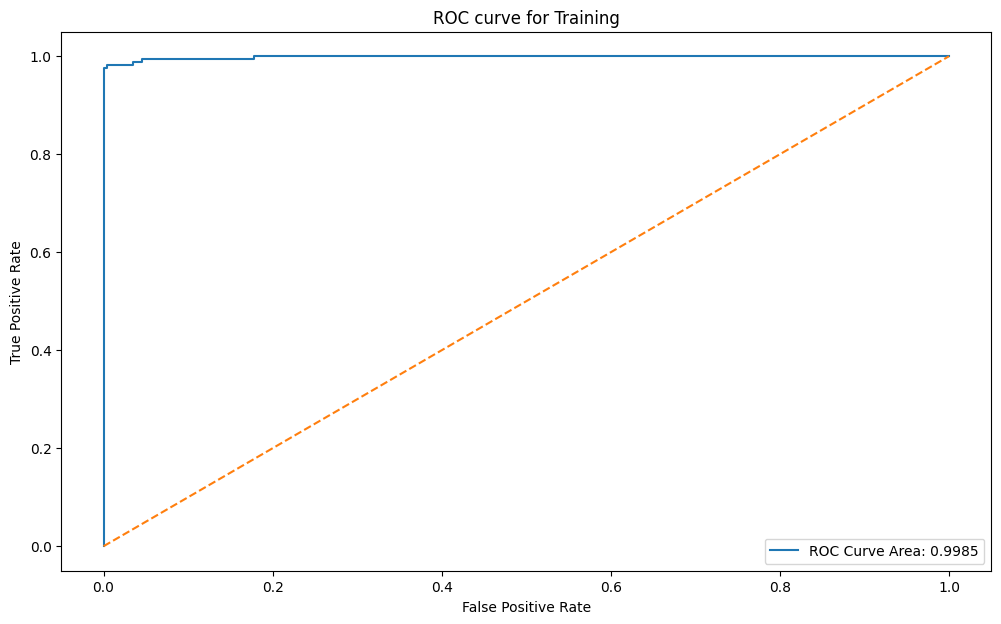

------------------------------------------------------------
Model Summary for Testing
------------------------------------------------------------
Accuracy Score is: 0.9646


Confusion Matrix is: 
[[69  2]
 [ 2 40]]




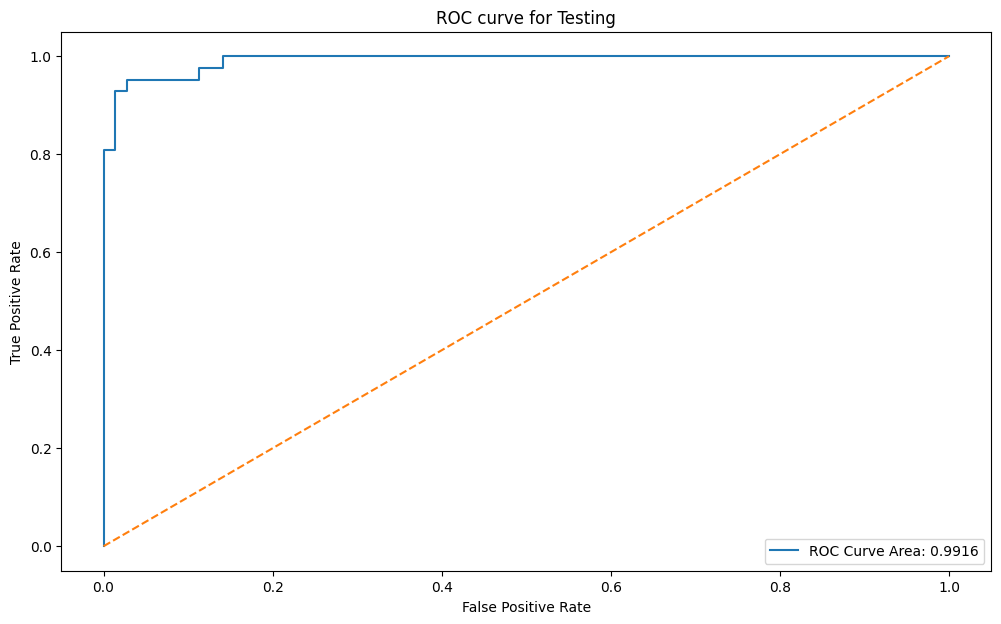

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.985819   0.985928  0.985819  0.985783  0.997487
test      0.970206   0.970901  0.970206  0.970083  0.992480


,acc,precision,recall,f1-score,auc
training,0.985819,0.985928,0.985819,0.985783,0.997487
test,0.970206,0.970901,0.970206,0.970083,0.992480


In [38]:
learning_strategy = 'supervised-svm'
summary['Supervized L1 SVM'] = monte_carlo_svm(wdbc_dataset, 30, learning_strategy)
df = pd.DataFrame(summary['Supervized L1 SVM'])
df


In [39]:
def semi_supervised_svm(training_features, training_labels, settings):
    labeled_idx = []
    unlabeled_idx = []
    
    for c in [0, 1]:
        c_idx, = np.where(training_labels == c)
        idx_num = round(len(c_idx) * 0.5)
        select_idx = np.random.choice(c_idx, idx_num, replace=False)
        labeled_idx.extend(select_idx)
    
    for i in range(len(training_features)):
        if i not in labeled_idx:
            unlabeled_idx.append(i)

    labeledX = training_features.iloc[labeled_idx].to_numpy().tolist()
    labeledY = training_labels.iloc[labeled_idx].to_numpy().tolist()
    unlabeledX = training_features.iloc[unlabeled_idx].to_numpy().tolist()
    unlabeledY = training_labels.iloc[unlabeled_idx].to_numpy().tolist()
    
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
    clf.fit(labeledX, labeledY)
    
    while len(unlabeledX) > 0:
        scores = clf.decision_function(unlabeledX)
        sorted_idx = sorted([i for i in range(len(unlabeledX))], 
                            key=lambda x : abs(scores[x]))
        unlabeledX = [unlabeledX[i] for i in sorted_idx]
        unlabeledY = [unlabeledY[i] for i in sorted_idx]
        
        labeledX.append(unlabeledX.pop())
        labeledY.append(unlabeledY.pop())
        clf.best_estimator_.fit(labeledX, labeledY)
    
    return clf

Iteration: 1 | Training Accuracy: 0.9846 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 0.1}

Iteration: 2 | Training Accuracy: 0.9825 | Testing Accuracy: 0.9823
Best parameter setting: {'C': 0.1}

Iteration: 3 | Training Accuracy: 0.9868 | Testing Accuracy: 0.9469
Best parameter setting: {'C': 0.1}

Iteration: 4 | Training Accuracy: 0.9846 | Testing Accuracy: 0.9558
Best parameter setting: {'C': 0.1}

Iteration: 5 | Training Accuracy: 0.9912 | Testing Accuracy: 0.9735
Best parameter setting: {'C': 1.0}

Iteration: 6 | Training Accuracy: 0.9868 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 0.1}

Iteration: 7 | Training Accuracy: 0.9825 | Testing Accuracy: 0.9823
Best parameter setting: {'C': 0.1}

Iteration: 8 | Training Accuracy: 0.9868 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 1.0}

Iteration: 9 | Training Accuracy: 0.9934 | Testing Accuracy: 0.9735
Best parameter setting: {'C': 1.0}

Iteration: 10 | Training Accuracy: 0.9846 | Testing Accuracy: 0.

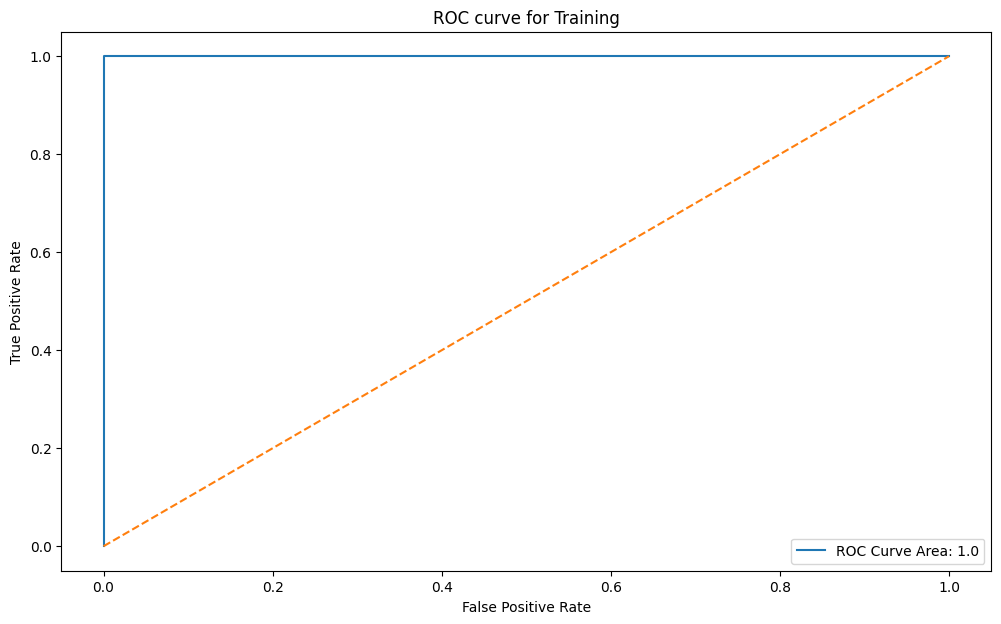

------------------------------------------------------------
Model Summary for Testing
------------------------------------------------------------
Accuracy Score is: 0.8938


Confusion Matrix is: 
[[64  7]
 [ 5 37]]




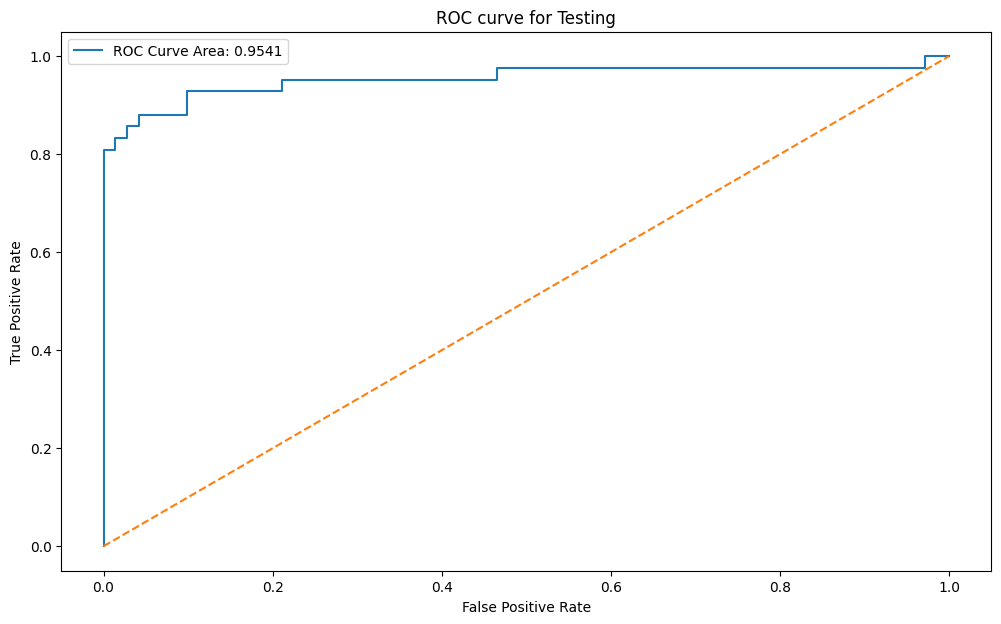

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score      auc
training  0.988962   0.989027  0.988962  0.988940  0.99818
test      0.964012   0.964799  0.964012  0.963976  0.98883


,acc,precision,recall,f1-score,auc
training,0.988962,0.989027,0.988962,0.988940,0.99818
test,0.964012,0.964799,0.964012,0.963976,0.98883


In [40]:
learning_strategy = 'semi-supervised-svm'
summary['Semi-Supervized L1 SVM'] = monte_carlo_svm(wdbc_dataset, 30, learning_strategy)
df = pd.DataFrame(summary['Semi-Supervized L1 SVM'])
df

### We can set the number of iterations so that we can avoid being trapped in a local minimum for k means algorithm.

In [52]:
from scipy.special import softmax

def get_distance(centers, X, cluster_label):
    dist = np.ndarray((X.shape[0],))
    proba = np.ndarray((X.shape[0], 2))
    for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        proba[i, 0] = np.linalg.norm(x - centers[0])
        proba[i, 1] = np.linalg.norm(x - centers[1])
    
    proba = softmax(proba, axis=1).astype(np.float64)
    return dist, proba

def get_majority(X, cluster_label, dist, Y):
    major_label = cluster_label.copy()
    label2cluster = {}
    for cluster in [0, 1]:  # assuming 2 clusters for simplicity
        sample_idx = np.where(cluster_label == cluster)[0]
        if len(sample_idx) == 0:
            continue  # Skip this iteration if no samples for the cluster

        top30 = sorted(sample_idx, key=lambda i: dist[i])[:30]
        if len(top30) == 0:
            continue  # Skip if there are fewer than 30 samples and top30 is empty

        # Safely attempt to calculate the majority
        value_counts = Y.iloc[top30].value_counts()
        if len(value_counts) == 0:
            continue  # Skip if value_counts is empty, avoiding idxmax() on empty Series

        majority = value_counts.idxmax()
        major_label[sample_idx] = majority
        label2cluster[majority] = cluster

    return label2cluster, major_label
    # label2cluster = np.ndarray((2,), dtype='int')
    # major_label = cluster_label.copy()
    # for cluster in [0, 1]:
    #     sample_idx = np.where(cluster_label == cluster)[0]
    #     top30 = sorted(sample_idx, key=lambda i: dist[i])[:30]
    #     majority = Y.iloc[top30].value_counts().idxmax()  # Correct method to find the index of the max count
    #     major_label[sample_idx] = majority
    #     label2cluster[majority] = cluster
    # return label2cluster, major_label
    # major_label = cluster_label.copy()
    # for cluster in [0, 1]:
    #     sample_idx, = np.where(cluster_label == cluster)
    #     top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
    #     majority = Y.iloc[top30].value_counts().split_indices[0]
    #     major_label[sample_idx] = majority
    #     label2cluster[majority] = cluster
    # return label2cluster, major_label

def predict_and_evaluate_model_v2(datasetY, datasetPredY, datasetPredY_prob):
    datasetReport = classification_report(datasetY, datasetPredY, output_dict=True)
    tmp_dataset_res = evaluate_metrics(datasetY, datasetPredY, datasetPredY_prob, datasetReport)
    return {
        'dataset_report': datasetReport,
        'tmp_dataset_res': tmp_dataset_res,
        'y_dataset_pred': datasetPredY,
        'y_dataset_pred_prob': datasetPredY_prob,
    }

In [48]:
def splitData(dataset, random_state, test_size=0.2):
    np.random.seed(random_state)
    b_idx, = np.where(dataset['label'] == 0)
    b_test_num = round(len(b_idx) * test_size)
    b_testing_indices = np.random.choice(b_idx, b_test_num, replace=False)
    m_idx, = np.where(dataset['label'] == 1)
    m_test_num = round(len(m_idx) * test_size)
    m_testing_indices = np.random.choice(m_idx, m_test_num, replace=False)
    testing_indices = np.concatenate([b_testing_indices, m_testing_indices])
    training_indices = np.array([i for i in range(dataset.shape[0]) if i not in testing_indices])
    training_features = dataset.iloc[training_indices, 2:].copy()
    training_labels = dataset.iloc[training_indices, 1].copy()
    testing_features = dataset.iloc[testing_indices, 2:].copy()
    testing_labels = dataset.iloc[testing_indices, 1].copy()
    
    return training_features, training_labels, testing_features, testing_labels

def normalizeData(training_features, testing_features):
    scaler = StandardScaler()
    norm_training_features = scaler.fit_transform(training_features)
    norm_testing_features = scaler.transform(testing_features)
    return norm_training_features, norm_testing_features

def evalMetrics(ground_truth, predict, prob, report):
    acc = report['accuracy']
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return {
        'acc' : acc,
        'precision' : report['weighted avg']['precision'],
        'recall' : report['weighted avg']['recall'],
        'f1-score' : report['weighted avg']['f1-score'],
        'auc' : roc_auc
    }

In [49]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

def monte_carlo_kmeans_spectral(dataset, n, learning_strategy):
    print ('=' * 60)
    print (f'Running method for {learning_strategy}')
    print ('=' * 60)
    
    cols = ['acc', 'precision', 'recall', 'f1-score', 'auc']
    train_resdf = pd.DataFrame(columns=cols)
    test_resdf = pd.DataFrame(columns=cols)
    
    for i in range(n):
        training_features, training_labels, testing_features, testing_labels = splitData(dataset, random_state=i, test_size=0.2)
        training_features, testing_features = normalizeData(training_features, testing_features)
        
        if learning_strategy == 'Unsupervised-KMeans':
            clusterer = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(training_features)

            # training
            train_cluster_label = clusterer.predict(training_features)
            dist, trainPredY_prob = get_distance(clusterer.cluster_centers_, training_features, train_cluster_label)
            label2cluster, trainPredY = get_majority(training_features, train_cluster_label, dist, training_labels)
        elif learning_strategy == 'Unsupervised-Spectral':
            cluster_label = SpectralClustering(n_clusters=2, 
                                               assign_labels='kmeans', 
                                               affinity='rbf', 
                                               eigen_tol = 1e-2, 
                                               eigen_solver = 'arpack', 
                                               random_state=0).fit_predict(training_features)
            cluster_centers = []
            for clus in [0,1]:
                cluster_centers.append(np.mean(training_features[cluster_label==clus], axis = 0).tolist())

            # build a KNN classifier
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(training_features, cluster_label)
            
            # training
            train_cluster_label = knn.predict(training_features)
            dist, trainPredY_prob = get_distance(cluster_centers, training_features, train_cluster_label)
            label2cluster, trainPredY = get_majority(training_features, train_cluster_label, dist, training_labels)
        
        
        
        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        trainReport = classification_report(training_labels, trainPredY, output_dict=True)
        tmp_train_res = evalMetrics(training_labels, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf._append(tmp_train_res,  ignore_index=True)
        
        # test
        if learning_strategy == 'Unsupervised-KMeans':
            test_cluster_label = clusterer.predict(testing_features)
            dist, testPredY_prob = get_distance(clusterer.cluster_centers_, testing_features, test_cluster_label)
        elif learning_strategy == 'Unsupervised-Spectral':
            test_cluster_label = knn.predict(testing_features)
            dist, testPredY_prob = get_distance(cluster_centers, testing_features, test_cluster_label)
            
        
        label2cluster, testPredY = get_majority(testing_features, test_cluster_label, dist, testing_labels)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        testReport = classification_report(testing_labels, testPredY, output_dict=True)
        tmp_test_res = evalMetrics(testing_labels, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf._append(tmp_test_res,  ignore_index=True)
        
        train_accuracy = trainReport['accuracy']
        test_accuracy = testReport['accuracy']
        print(f'Iteration: {i + 1} | Training Accuracy: {round(train_accuracy, 4)} | Testing Accuracy: {round(test_accuracy, 4)}')
    
    print('-' * 80)
    print('\nDetail report of 30th run of Monte-Calo\n')
    
    calculate_model_summary(training_labels, trainPredY, trainPredY_prob, 'Training')
    calculate_model_summary(testing_labels, testPredY, testPredY_prob, 'Test')
    
    summary = summarize_results(train_resdf, test_resdf)
    return summary

Running method for Unsupervised-KMeans
Iteration: 1 | Training Accuracy: 0.8969 | Testing Accuracy: 0.9469
Iteration: 2 | Training Accuracy: 0.9167 | Testing Accuracy: 0.9027
Iteration: 3 | Training Accuracy: 0.9079 | Testing Accuracy: 0.9027
Iteration: 4 | Training Accuracy: 0.9123 | Testing Accuracy: 0.9027
Iteration: 5 | Training Accuracy: 0.8991 | Testing Accuracy: 0.9381
Iteration: 6 | Training Accuracy: 0.9123 | Testing Accuracy: 0.8761
Iteration: 7 | Training Accuracy: 0.9057 | Testing Accuracy: 0.9115
Iteration: 8 | Training Accuracy: 0.9189 | Testing Accuracy: 0.8761
Iteration: 9 | Training Accuracy: 0.9298 | Testing Accuracy: 0.8673
Iteration: 10 | Training Accuracy: 0.9057 | Testing Accuracy: 0.9115
Iteration: 11 | Training Accuracy: 0.9035 | Testing Accuracy: 0.9204
Iteration: 12 | Training Accuracy: 0.8991 | Testing Accuracy: 0.9381
Iteration: 13 | Training Accuracy: 0.9013 | Testing Accuracy: 0.9292
Iteration: 14 | Training Accuracy: 0.9035 | Testing Accuracy: 0.9204
Iter

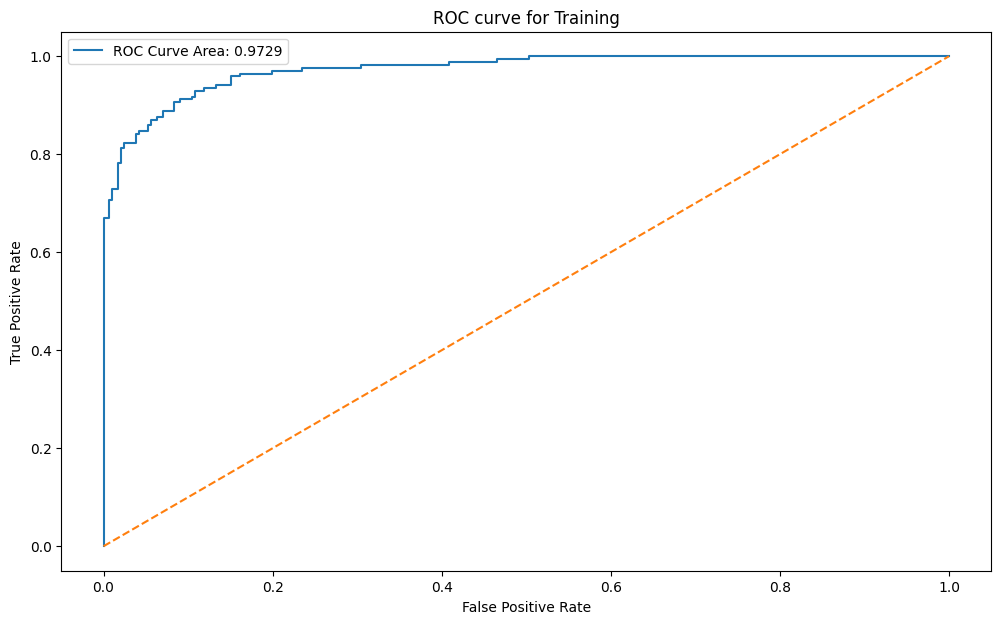

------------------------------------------------------------
Model Summary for Test
------------------------------------------------------------
Accuracy Score is: 0.9027


Confusion Matrix is: 
[[69  2]
 [ 9 33]]




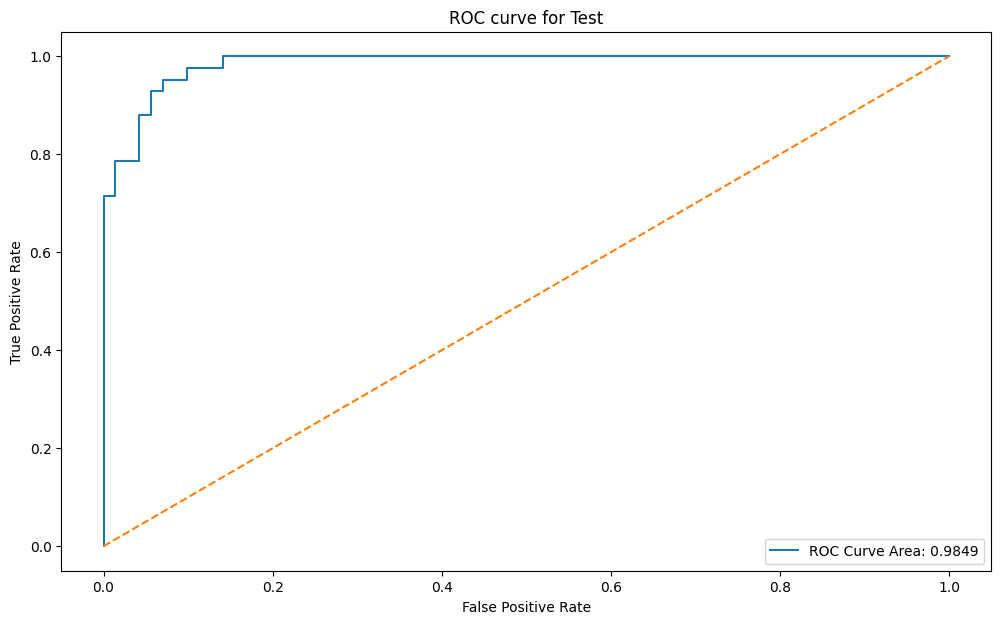

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.909649   0.910456  0.909649  0.908594  0.974210
test      0.911504   0.913443  0.911504  0.910228  0.975667


,acc,precision,recall,f1-score,auc
training,0.909649,0.910456,0.909649,0.908594,0.974210
test,0.911504,0.913443,0.911504,0.910228,0.975667


In [50]:
learning_strategy = 'Unsupervised-KMeans'
summary['Unsupervised KMeans'] = monte_carlo_kmeans_spectral(wdbc_dataset, 30, learning_strategy)
df = pd.DataFrame(summary['Unsupervised KMeans'])
df

Running method for Unsupervised-Spectral
Iteration: 1 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
Iteration: 2 | Training Accuracy: 0.6294 | Testing Accuracy: 0.6372
Iteration: 3 | Training Accuracy: 0.6294 | Testing Accuracy: 0.6283
Iteration: 4 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
Iteration: 5 | Training Accuracy: 0.6294 | Testing Accuracy: 0.6372
Iteration: 6 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
Iteration: 7 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
Iteration: 8 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
Iteration: 9 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
Iteration: 10 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
Iteration: 11 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
Iteration: 12 | Training Accuracy: 0.6294 | Testing Accuracy: 0.6372
Iteration: 13 | Training Accuracy: 0.6316 | Testing Accuracy: 0.6283
Iteration: 14 | Training Accuracy: 0.6272 | Testing Accuracy: 0.6283
It

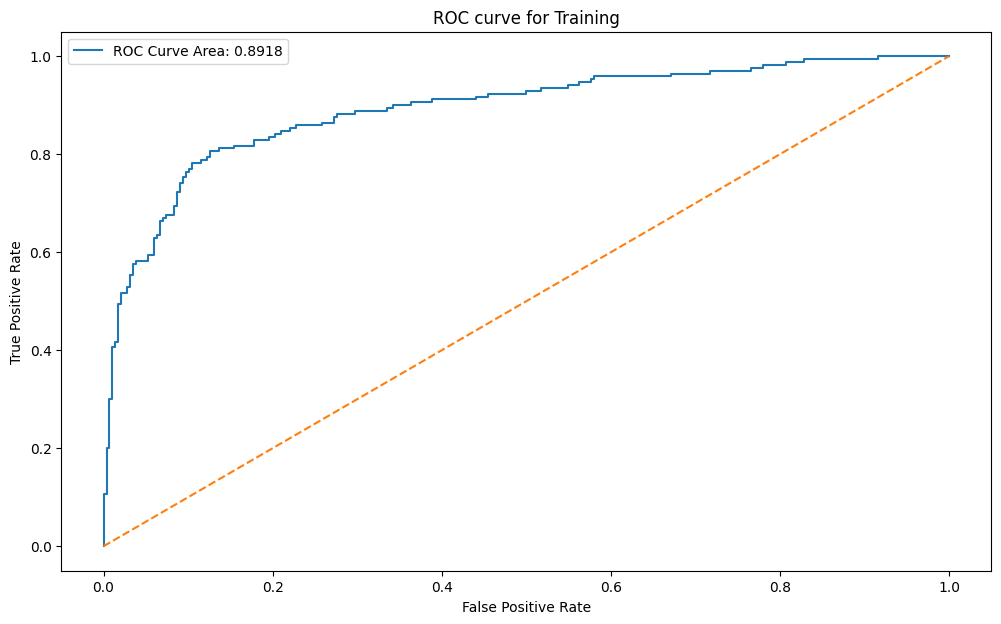

------------------------------------------------------------
Model Summary for Test
------------------------------------------------------------
Accuracy Score is: 0.6372


Confusion Matrix is: 
[[71  0]
 [41  1]]




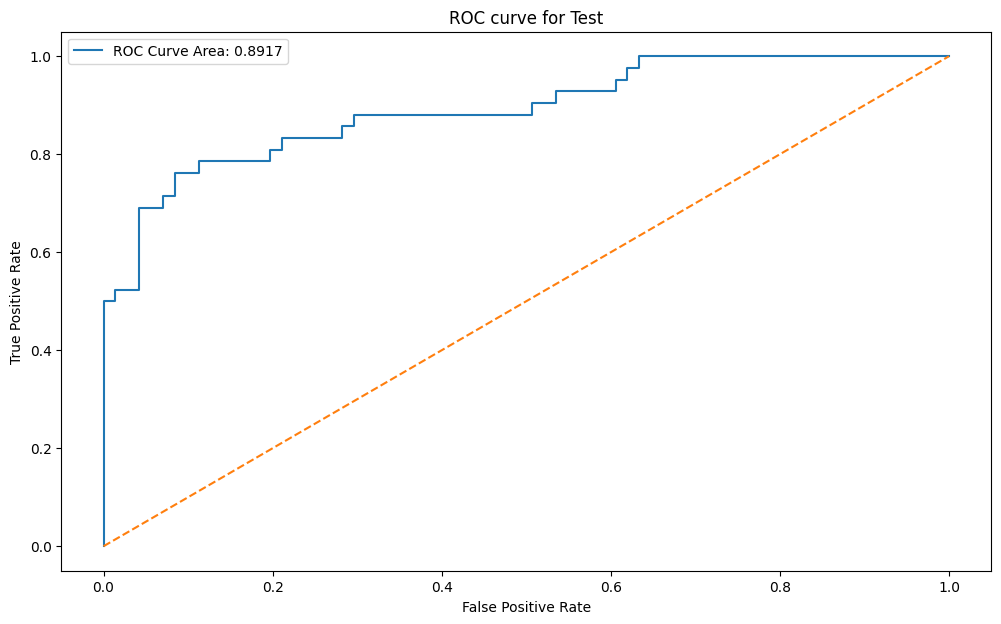

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.628509   0.580294  0.628509  0.486499  0.579593
test      0.631268   0.519853  0.631268  0.491544  0.811550


,acc,precision,recall,f1-score,auc
training,0.628509,0.580294,0.628509,0.486499,0.579593
test,0.631268,0.519853,0.631268,0.491544,0.811550


In [53]:
learning_strategy = 'Unsupervised-Spectral'
summary['Unsupervised-Spectral'] = monte_carlo_kmeans_spectral(wdbc_dataset, 30, learning_strategy)
df = pd.DataFrame(summary['Unsupervised-Spectral'])
df

## 1(b)-v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.*

In [54]:
def summarization():
    for summ in summary.keys():
        print('\n')
        print('='*60)
        print(summ)
        print('='*60)
        print(summary[summ])

In [55]:
summarization()



Supervized L1 SVM
               acc  precision    recall  f1-score       auc
training  0.985819   0.985928  0.985819  0.985783  0.997487
test      0.970206   0.970901  0.970206  0.970083  0.992480


Semi-Supervized L1 SVM
               acc  precision    recall  f1-score      auc
training  0.988962   0.989027  0.988962  0.988940  0.99818
test      0.964012   0.964799  0.964012  0.963976  0.98883


Unsupervised KMeans
               acc  precision    recall  f1-score       auc
training  0.909649   0.910456  0.909649  0.908594  0.974210
test      0.911504   0.913443  0.911504  0.910228  0.975667


Unsupervised-Spectral
               acc  precision    recall  f1-score       auc
training  0.628509   0.580294  0.628509  0.486499  0.579593
test      0.631268   0.519853  0.631268  0.491544  0.811550


### 1(b)-IV. From the summary above, it's clear that Supervised methods outperform Semi-Supervised ones, which themselves perform better than Unsupervised methods. However, the gap in performance is much larger and more notable between Semi-Supervised and Unsupervised methods than it is between Supervised and Semi-Supervised methods.

### 2. Active Learning Using Support Vector Machines

In [57]:
banknote_dataset = "../Data/data_banknote_authentication.txt"


banknote_dataset = pd.read_csv(banknote_dataset, header=None)
banknote_dataset.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote_dataset

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [58]:
banknote_dataset['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [59]:
def random_split():    
    train_dp = 900
    test_dp = 472

    testing_indices = np.random.choice(banknote_dataset.shape[0], test_dp, replace=False)

    temp_list = []
    for i in range(banknote_dataset.shape[0]):
        if i not in testing_indices:
            temp_list.append(i)

    training_indices = np.array(temp_list)
    return {
        'training_indices': training_indices,
        'testing_indices': testing_indices,
    }

In [60]:
split_indices = random_split()
banknote_train = banknote_dataset.iloc[split_indices['training_indices']]
banknote_test = banknote_dataset.iloc[split_indices['testing_indices']]

In [61]:
banknote_train

,variance,skewness,curtosis,entropy,class
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
5,4.36840,9.67180,-3.9606,-3.16250,0
7,2.09220,-6.81000,8.4636,-0.60216,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [62]:
banknote_test

,variance,skewness,curtosis,entropy,class
989,-6.75260,8.81720,-0.061983,-3.72500,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
1036,-2.38980,-0.78427,3.014100,0.76205,1
268,0.92970,-3.79710,4.642900,-0.29570,0
1106,-0.12690,-1.15050,-0.951380,0.57843,1
...,...,...,...,...,...
1360,-0.24745,1.93680,-2.469700,-0.80518,1
274,5.27560,0.13863,0.121380,1.14350,0
509,-0.29510,9.04890,-0.527250,-2.07890,0
930,-2.22140,-0.23798,0.560080,0.05602,1


In [63]:
def passive_mode_learning(training_features, training_labels, testing_features, testing_labels, settings):
    touse_idx = np.arange(training_features.shape[0])
    
    used_idx = []
    accuracy_list = []
    
    while len(touse_idx) > 0:
        np.random.shuffle(touse_idx)
        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)
        
        used_training_features, used_training_labels = training_features.iloc[used_idx], training_labels.iloc[used_idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_training_features, used_training_labels)
        
        testPredY = clf.predict(testing_features)
        testReport = classification_report(testing_labels, testPredY, output_dict=True)
        accuracy_list.append(testReport['accuracy'])
    
    return accuracy_list

def active_mode_learning(training_features, training_labels, testing_features, testing_labels, settings):
    touse_idx = np.arange(training_features.shape[0])
    used_idx = []
    accuracy_list = []
    
    np.random.shuffle(touse_idx)
    pool, touse_idx = touse_idx[:10], touse_idx[10:]
    used_idx.extend(pool)
    
    while len(used_idx) <= 900:
        used_training_features, used_training_labels = training_features.iloc[used_idx], training_labels.iloc[used_idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_training_features, used_training_labels)
        
        testPredY = clf.predict(testing_features)
        testReport = classification_report(testing_labels, testPredY, output_dict=True)
        accuracy_list.append(testReport['accuracy'])
        
        if len(touse_idx) == 0:
            break
        
        dist = clf.decision_function(training_features.iloc[touse_idx])
        sortedarg = np.arange(len(touse_idx))
        sorted(sortedarg, key=lambda i : abs(dist[i]))
        touse_idx = touse_idx[sortedarg]
        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)
        
    return accuracy_list

def monte_carlo_learning_strategy_learning(dataset, n, learning_strategy):
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    
    kwargs = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    performance_trend = []
    
    for i in range(n):
        
        split_indices = random_split()
        training_indices = split_indices['training_indices']
        testing_indices = split_indices['testing_indices']
        
        training_set, testing_set = dataset.iloc[training_indices], dataset.iloc[testing_indices]
        training_features, training_labels = training_set.iloc[:, :-1], training_set.iloc[:, -1]
        testing_features, testing_labels = testing_set.iloc[:, :-1], testing_set.iloc[:, -1]
        training_features, testing_features = normalize_dataset(training_features, testing_features)
        kwargs['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
        if (learning_strategy == 'passive_mode'):            
            # passive_mode learning
            accuracy_list = passive_mode_learning(training_features, training_labels, testing_features, testing_labels, kwargs)
            performance_trend.append(accuracy_list)
        elif (learning_strategy == 'active_mode'):
            # passive_mode learning
            accuracy_list = active_mode_learning(training_features, training_labels, testing_features, testing_labels, kwargs)
            performance_trend.append(accuracy_list)
        
        print(f"Iteration {i + 1} | Test accuracy (10 samples): {round(accuracy_list[0], 4)} | Test accuracy (900 samples): {round(accuracy_list[-1], 4)}")
    
    performance_trend = np.array(performance_trend)
    performance_trend = np.mean(performance_trend, axis=0)
    return performance_trend

In [64]:
iterations = 50
learning_strategy = 'passive_mode'
passive_mode_performance_trend = monte_carlo_learning_strategy_learning(banknote_dataset, iterations, learning_strategy)

Iteration 1 | Test accuracy (10 samples): 0.9131 | Test accuracy (900 samples): 0.9915
Iteration 2 | Test accuracy (10 samples): 0.8453 | Test accuracy (900 samples): 0.9852
Iteration 3 | Test accuracy (10 samples): 0.8093 | Test accuracy (900 samples): 0.9788
Iteration 4 | Test accuracy (10 samples): 0.7648 | Test accuracy (900 samples): 0.9873
Iteration 5 | Test accuracy (10 samples): 0.8326 | Test accuracy (900 samples): 0.9873
Iteration 6 | Test accuracy (10 samples): 0.9682 | Test accuracy (900 samples): 0.9894
Iteration 7 | Test accuracy (10 samples): 0.8475 | Test accuracy (900 samples): 0.9873
Iteration 8 | Test accuracy (10 samples): 0.6504 | Test accuracy (900 samples): 0.9936
Iteration 9 | Test accuracy (10 samples): 0.9597 | Test accuracy (900 samples): 0.9894
Iteration 10 | Test accuracy (10 samples): 0.9661 | Test accuracy (900 samples): 0.9894
Iteration 11 | Test accuracy (10 samples): 0.9428 | Test accuracy (900 samples): 0.9894
Iteration 12 | Test accuracy (10 samples)

In [65]:
iterations = 50
learning_strategy = 'active_mode'
active_mode_performance_trend = monte_carlo_learning_strategy_learning(banknote_dataset, iterations, learning_strategy)

Iteration 1 | Test accuracy (10 samples): 0.8941 | Test accuracy (900 samples): 0.9831
Iteration 2 | Test accuracy (10 samples): 0.9788 | Test accuracy (900 samples): 0.9915
Iteration 3 | Test accuracy (10 samples): 0.9619 | Test accuracy (900 samples): 0.9873
Iteration 4 | Test accuracy (10 samples): 0.8369 | Test accuracy (900 samples): 0.9852
Iteration 5 | Test accuracy (10 samples): 0.8263 | Test accuracy (900 samples): 0.9809
Iteration 6 | Test accuracy (10 samples): 0.8496 | Test accuracy (900 samples): 0.9873
Iteration 7 | Test accuracy (10 samples): 0.5784 | Test accuracy (900 samples): 0.9894
Iteration 8 | Test accuracy (10 samples): 0.9682 | Test accuracy (900 samples): 0.9958
Iteration 9 | Test accuracy (10 samples): 0.7775 | Test accuracy (900 samples): 0.9936
Iteration 10 | Test accuracy (10 samples): 0.8326 | Test accuracy (900 samples): 0.9894
Iteration 11 | Test accuracy (10 samples): 0.8517 | Test accuracy (900 samples): 0.9873
Iteration 12 | Test accuracy (10 samples)

In [66]:
def plot_performance_trend(active_mode, passive_mode):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"Learning Curve by Monte-Carlo Simulation")
    x = 10 * np.arange(1, 91)
    axes.plot(x, 1 - passive_mode, label='Passive')
    axes.plot(x, 1 - active_mode, label='Active')
    axes.set_xlabel("Training Set Size")
    axes.set_ylabel("Test Error")
    axes.legend()
    plt.show()

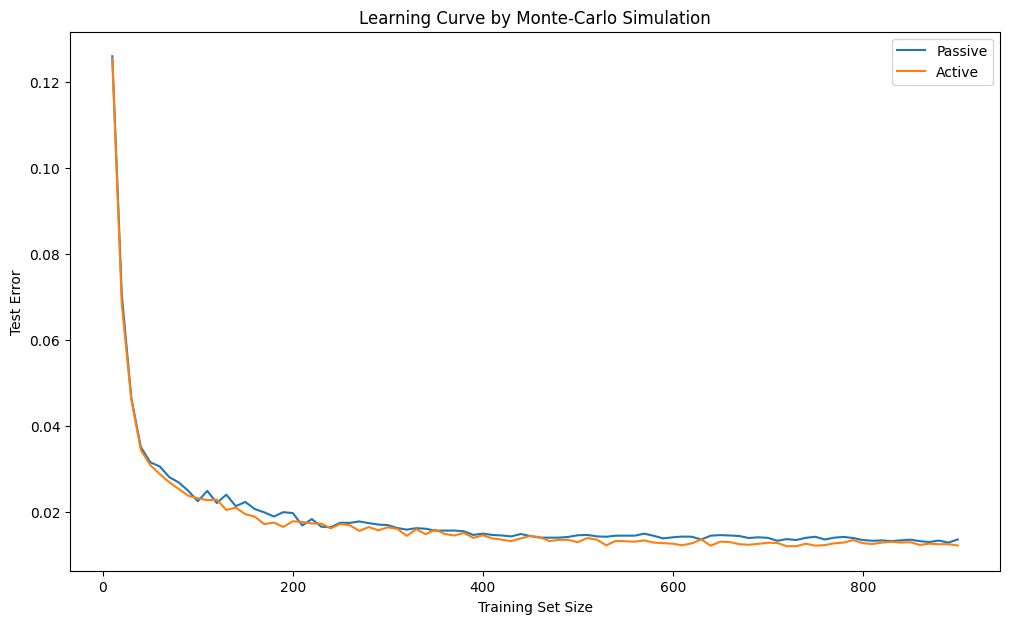

In [67]:
plot_performance_trend(active_mode_performance_trend, passive_mode_performance_trend)